In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

In [187]:
train = pd.read_csv('Train_Data.csv')
test = pd.read_csv('Test_Data.csv')

In [188]:
test.head()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,77017.0,1.0,1.0,32.2,96.0,2.0,135.0,15.11
1,75580.0,2.0,2.0,26.3,100.0,2.0,141.0,15.26
2,73820.0,1.0,2.0,28.6,107.0,2.0,136.0,8.82
3,80489.0,2.0,1.0,22.1,93.0,2.0,111.0,12.13
4,82047.0,1.0,1.0,24.7,91.0,2.0,105.0,3.12


In [189]:
train.head()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult


<Axes: >

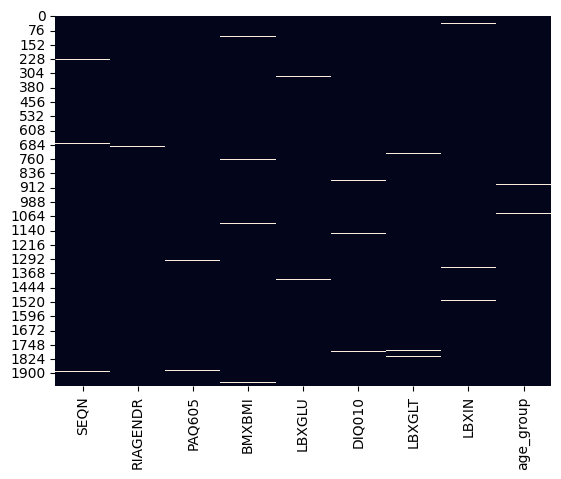

In [190]:
sns.heatmap(train.isnull(), cbar=False)

<Axes: >

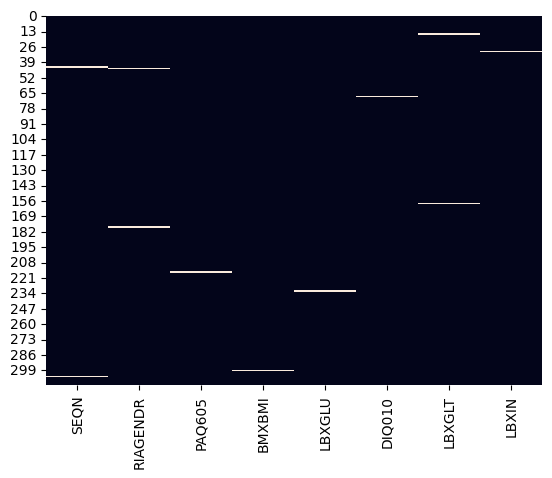

In [191]:
sns.heatmap(test.isnull(), cbar=False)

In [192]:
duplicate= train[train.duplicated()]
print("Number of Duplicate Rows:",len(duplicate))
print((train == np.inf).sum())

Number of Duplicate Rows: 0
SEQN         0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
age_group    0
dtype: int64


In [193]:
duplicate= test[test.duplicated()]
print("Number of Duplicate Rows:",len(duplicate))
print((test == np.inf).sum())

Number of Duplicate Rows: 0
SEQN        0
RIAGENDR    0
PAQ605      0
BMXBMI      0
LBXGLU      0
DIQ010      0
LBXGLT      0
LBXIN       0
dtype: int64


In [194]:
#Feature-wise Missing Value Handling Strategy
#Feature 01: RIAGENDR	Categorical	Gender (1 = Male, 2 = Female)	Mode
mode_gender = train['RIAGENDR'].mode()[0]
train['RIAGENDR'].fillna(mode_gender, inplace=True)
test['RIAGENDR'].fillna(mode_gender, inplace=True)

C:\Users\Priyangshu Malakar\AppData\Local\Temp\ipykernel_1528\2541621131.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['RIAGENDR'].fillna(mode_gender, inplace=True)
C:\Users\Priyangshu Malakar\AppData\Local\Temp\ipykernel_1528\2541621131.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [195]:
#Feature- 2 PAQ605 Categorical	Physical activity participation (Yes = 1, No = 2)- Mode
mode_paq605 = train['PAQ605'].mode()[0]
train['PAQ605'].fillna(mode_paq605, inplace=True)
test['PAQ605'].fillna(mode_paq605, inplace=True)

C:\Users\Priyangshu Malakar\AppData\Local\Temp\ipykernel_1528\1887805435.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['PAQ605'].fillna(mode_paq605, inplace=True)
C:\Users\Priyangshu Malakar\AppData\Local\Temp\ipykernel_1528\1887805435.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [196]:
#Feature 03 : BMXBMI Numeric	Body Mass Index	Median - Median
median_bmi = train['BMXBMI'].median()
train['BMXBMI'].fillna(median_bmi, inplace=True)
test['BMXBMI'].fillna(median_bmi, inplace=True)

C:\Users\Priyangshu Malakar\AppData\Local\Temp\ipykernel_1528\2841428652.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['BMXBMI'].fillna(median_bmi, inplace=True)
C:\Users\Priyangshu Malakar\AppData\Local\Temp\ipykernel_1528\2841428652.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [197]:
#Feature 04:   LBXGLU	Numeric	Glucose level-	Median 
median_glucose = train['LBXGLU'].median()
train['LBXGLU'].fillna(median_glucose, inplace=True)
test['LBXGLU'].fillna(median_glucose, inplace=True)

C:\Users\Priyangshu Malakar\AppData\Local\Temp\ipykernel_1528\245996981.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['LBXGLU'].fillna(median_glucose, inplace=True)
C:\Users\Priyangshu Malakar\AppData\Local\Temp\ipykernel_1528\245996981.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [198]:
#Feature 05 : DIQ010	Categorical	Diabetes → then Mode
#(1 = Yes, 2 = No, 3 = Borderline, 7 = Refused, 9 = Don't Know)

train['DIQ010'].replace([7, 9], np.nan, inplace=True)
test['DIQ010'].replace([7, 9], np.nan, inplace=True)
mode_diq = train['DIQ010'].mode()[0]
train['DIQ010'].fillna(mode_diq, inplace=True)
test['DIQ010'].fillna(mode_diq, inplace=True)

C:\Users\Priyangshu Malakar\AppData\Local\Temp\ipykernel_1528\674743943.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['DIQ010'].replace([7, 9], np.nan, inplace=True)
C:\Users\Priyangshu Malakar\AppData\Local\Temp\ipykernel_1528\674743943.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [199]:
#Feature 06: LBXGLT	Numeric	Glucose tolerance	Median

median_glucose_tolerance = train['LBXGLT'].median()
train['LBXGLT'].fillna(median_glucose_tolerance, inplace=True)
test['LBXGLT'].fillna(median_glucose_tolerance, inplace=True)

C:\Users\Priyangshu Malakar\AppData\Local\Temp\ipykernel_1528\1443371505.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['LBXGLT'].fillna(median_glucose_tolerance, inplace=True)
C:\Users\Priyangshu Malakar\AppData\Local\Temp\ipykernel_1528\1443371505.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

In [200]:
#Feature 07: LBXIN	Numeric	Insulin level	Median

median_insulin = train['LBXIN'].median()
train['LBXIN'].fillna(median_insulin, inplace=True)
test['LBXIN'].fillna(median_insulin, inplace=True)

C:\Users\Priyangshu Malakar\AppData\Local\Temp\ipykernel_1528\2376418136.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['LBXIN'].fillna(median_insulin, inplace=True)
C:\Users\Priyangshu Malakar\AppData\Local\Temp\ipykernel_1528\2376418136.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

<Axes: >

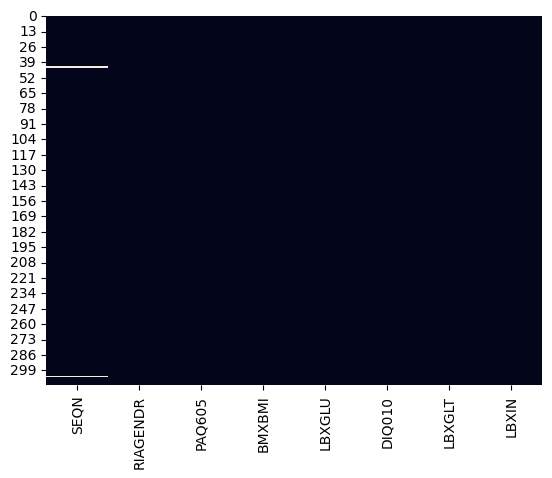

In [201]:
sns.heatmap(test.isnull(), cbar=False)

<Axes: >

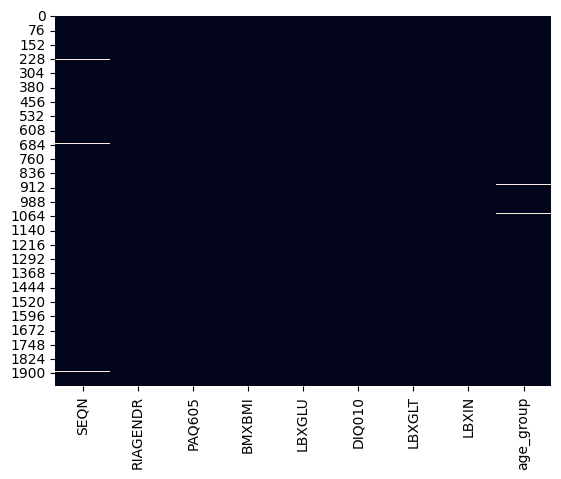

In [202]:
sns.heatmap(train.isnull(), cbar=False)

In [203]:
train.dropna(subset=['age_group'], inplace=True)

<Axes: >

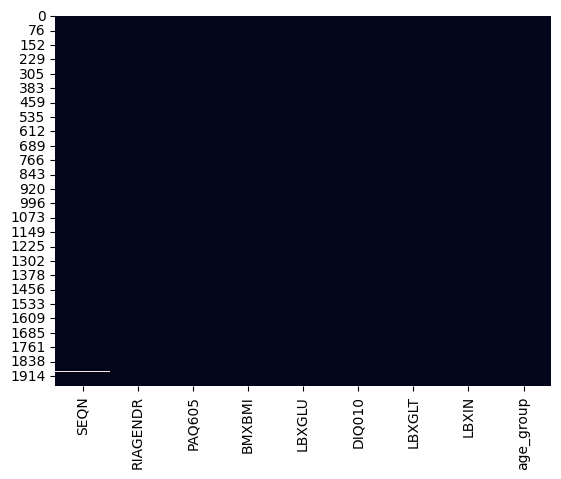

In [204]:
sns.heatmap(train.isnull(), cbar=False)

In [205]:
X = train.drop(columns=['SEQN', 'age_group'])
y = train['age_group'].map({'Adult': 0, 'Senior': 1})
X_test = test.drop(columns=['SEQN'])

In [206]:
X.head()

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [207]:
X_test.head()

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,1.0,1.0,32.2,96.0,2.0,135.0,15.11
1,2.0,2.0,26.3,100.0,2.0,141.0,15.26
2,1.0,2.0,28.6,107.0,2.0,136.0,8.82
3,2.0,1.0,22.1,93.0,2.0,111.0,12.13
4,1.0,1.0,24.7,91.0,2.0,105.0,3.12


<Axes: >

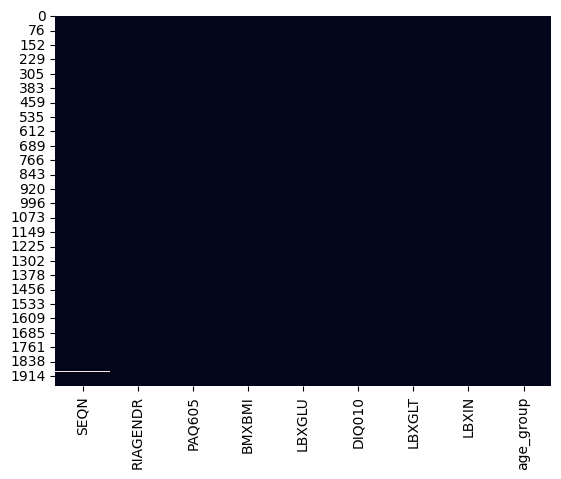

In [208]:
sns.heatmap(train.isnull(), cbar=False)

<Axes: >

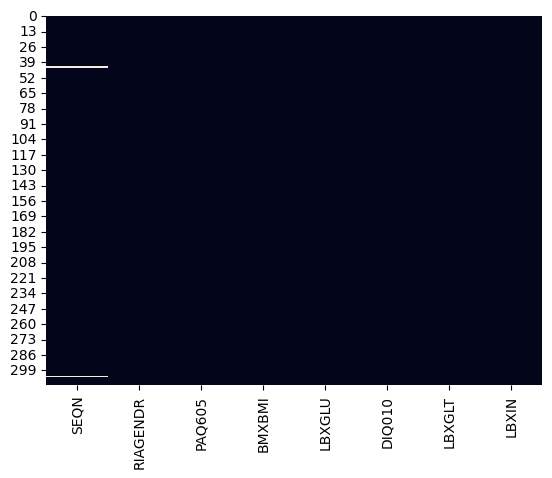

In [209]:
sns.heatmap(test.isnull(), cbar=False)

In [262]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [263]:
#Model 01-RF
model = RandomForestClassifier(n_estimators=600, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600, random_state=42)

In [264]:
y_pred_val = model.predict(X_val)
f1_Rf = f1_score(y_val, y_pred_val)
print("Validation F1 Score for RF:", f1_Rf)

Validation F1 Score for RF: 0.21875


In [265]:
#Model 02- XG Boost
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
xgb_model = xgb.XGBClassifier(
    n_estimators=55,
    max_depth=1,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    gamma=1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)
f1_xgb = f1_score(y_val, y_pred_xgb)
print("XGBoost Validation F1 Score:", f1_xgb)

XGBoost Validation F1 Score: 0.423841059602649


C:\Users\Priyangshu Malakar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:33:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [266]:
#Model 03- Logistic Regression
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_val)
f1_lr = f1_score(y_val, y_pred_lr)
print("Logistic Regression Validation F1 Score:", f1_lr)

Logistic Regression Validation F1 Score: 0.3875432525951557


In [267]:
##Model 04- CatBoost

from sklearn.utils.class_weight import compute_class_weight
import numpy as np
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weights_dict = dict(zip(classes, class_weights))
model = CatBoostClassifier(
    iterations=1000,
    depth=1,
    l2_leaf_reg=3,
    learning_rate=0.01,
    random_seed=42,
    verbose=False,
    class_weights=class_weights_dict
)

model.fit(X_train, y_train,)
y_pred = model.predict(X_val)
f1_cat = f1_score(y_val, y_pred)
print("CatBoost Validation F1 Score:", f1_cat)

CatBoost Validation F1 Score: 0.40955631399317405


In [268]:
#Model 05- SVM
svm_model = make_pipeline(
    StandardScaler(),
    SVC(class_weight='balanced', random_state=42)
)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_val)
f1_SVM = f1_score(y_val, y_pred)
print("SVM Validation F1 Score:", f1_SVM)

SVM Validation F1 Score: 0.40131578947368424


In [235]:
#Model 06- Naive Bayes

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_val)
f1_nb = f1_score(y_val, y_pred_nb)
print("Naive Bayes Validation F1 Score:", f1_nb)

Naive Bayes Validation F1 Score: 0.18604651162790697


In [245]:
#Model 07- KNN 

knn_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=1)  
)

knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_val)
f1_knn = f1_score(y_val, y_pred_knn)
print("KNN Validation F1 Score:", f1_knn)

KNN Validation F1 Score: 0.28272251308900526


In [258]:
#Model 08- Gradient Boosting

gb_model = GradientBoostingClassifier(
    n_estimators=105,
    learning_rate=0.1,
    max_depth=9,
    random_state=42
)

gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_val)
f1_gb = f1_score(y_val, y_pred_gb)
print("Gradient Boosting Validation F1 Score:", f1_gb)

Gradient Boosting Validation F1 Score: 0.23943661971830985


In [269]:
# All F1 scores
f1_scores = {
    "Random Forest": f1_Rf,
    "XGBoost": f1_xgb,
    "Logistic Regression": f1_lr,
    "CatBoost": f1_cat,
    "SVM": f1_SVM,
    "Naive Bayes": f1_nb,
    "KNN": f1_knn,
    "Gradient Boosting": f1_gb
}

for model, score in f1_scores.items():
    print(f"Validation F1 Score for {model}: {score:.4f}")

#Highest F1
best_model = max(f1_scores, key=f1_scores.get)
best_score = f1_scores[best_model]
print(f"\n🔝 Highest F1 Score: {best_score:.4f} by {best_model}")


Validation F1 Score for Random Forest: 0.2188
Validation F1 Score for XGBoost: 0.4238
Validation F1 Score for Logistic Regression: 0.3875
Validation F1 Score for CatBoost: 0.4096
Validation F1 Score for SVM: 0.4013
Validation F1 Score for Naive Bayes: 0.1860
Validation F1 Score for KNN: 0.2827
Validation F1 Score for Gradient Boosting: 0.2394

🔝 Highest F1 Score: 0.4238 by XGBoost


In [270]:
# Predict on the test set
y_test_pred_xgb = xgb_model.predict(X_test)
submission_xgb = pd.DataFrame({
    'age_group': y_test_pred_xgb.astype(int)
})

submission_xgb.to_csv('submission.csv', index=False)
print("XGBoost submission saved as 'submission.csv'")

XGBoost submission saved as 'submission.csv'
